In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/game-of-thrones/character-deaths.csv
/kaggle/input/game-of-thrones/character-predictions.csv
/kaggle/input/game-of-thrones/battles.csv


In [43]:
deathDF = pd.read_csv("/kaggle/input/game-of-thrones/character-deaths.csv")
deathDF.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
8,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,1,0,0,0,1,0,0


In [44]:
battlesDF = pd.read_csv("/kaggle/input/game-of-thrones/battles.csv")
battlesDF.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


Первым делом поизучаем, кто из героев и когда покинул мир книг. Посмотрим, как распределеные переменные (построем гистограммы).

In [45]:
alleg_none = pd.DataFrame(deathDF[deathDF['Allegiances'] == 'None'])
alleg_none.head()
#deathDF[deathDF['Allegiances'] == 'None']

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
13,Alayaya,None,NaN,NaN,NaN,15.0,0,0,0,1,0,0,0
20,Alia of Braavos,None,NaN,NaN,NaN,28.0,0,0,1,0,0,0,0
30,Alyx Frey,None,NaN,NaN,NaN,49.0,1,1,0,0,1,0,0


In [46]:
for i in range(len(deathDF)):
    if type(deathDF['Allegiances'].iloc[i]) != str:
        print(deathDF['Allegiances'].iloc[i])

In [47]:
for i in range(len(deathDF)):
    if deathDF['Allegiances'].iloc[i] == "None":
        deathDF['Allegiances'].iloc[i] = np.nan

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
count = 0
for i in range(len(deathDF)):
    if deathDF['Allegiances'].iloc[i] == np.nan:
        count+=1
print(count)

0


In [49]:
d = pd.DataFrame(deathDF['Name'].groupby(deathDF['Allegiances']).count())
d.reset_index()
d = d.rename({'Name': 'Person_count'}, axis='columns')
d

,Person_count
Allegiances,
Arryn,23
Baratheon,56
Greyjoy,51
House Arryn,7
House Baratheon,8
House Greyjoy,24
House Lannister,21
House Martell,12
House Stark,35


[Text(0, 0, 'Arryn'),
 Text(0, 0, 'Baratheon'),
 Text(0, 0, 'Greyjoy'),
 Text(0, 0, 'House Arryn'),
 Text(0, 0, 'House Baratheon'),
 Text(0, 0, 'House Greyjoy'),
 Text(0, 0, 'House Lannister'),
 Text(0, 0, 'House Martell'),
 Text(0, 0, 'House Stark'),
 Text(0, 0, 'House Targaryen'),
 Text(0, 0, 'House Tully'),
 Text(0, 0, 'House Tyrell'),
 Text(0, 0, 'Lannister'),
 Text(0, 0, 'Martell'),
 Text(0, 0, "Night's Watch"),
 Text(0, 0, 'Stark'),
 Text(0, 0, 'Targaryen'),
 Text(0, 0, 'Tully'),
 Text(0, 0, 'Tyrell'),
 Text(0, 0, 'Wildling')]

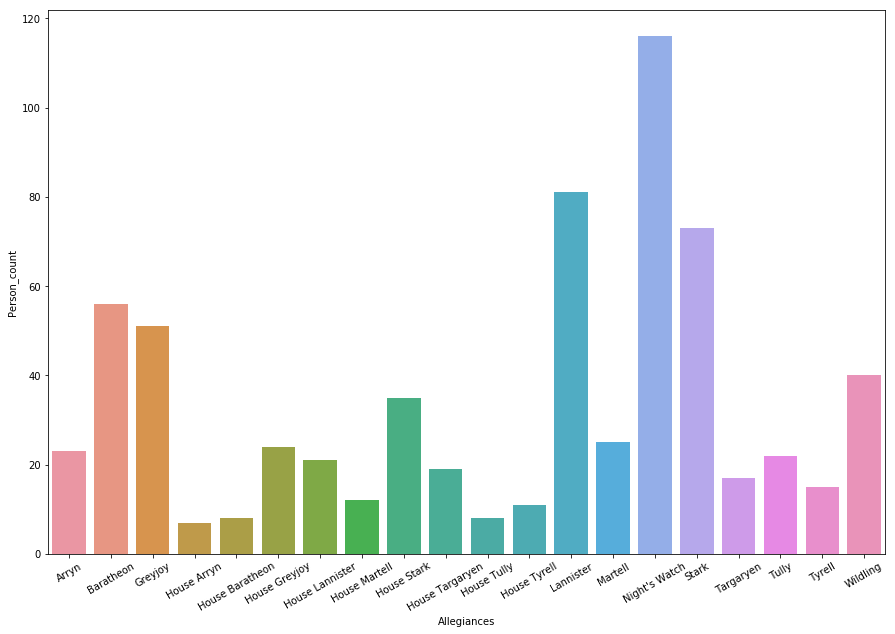

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
pic = sns.barplot(x = d.index, y = 'Person_count', data = d)
pic.set_xticklabels(rotation=30, labels = d.index)

Видим, что больше всего погибло мертвых ходоков. :) 
Следующие по количествую погибших героев - семья Ланистеров (81 погибший герой), на третьем месте - Старки (73 героя погибло).

Если посмотрим на дома, увидим, что больше всего героев книги погибло из дома Старков. На втором и третьем местах соответственно дома Баратеонов и Грейджоев

In [51]:
d2 = pd.DataFrame(deathDF['Gender'].groupby(deathDF['Allegiances']).sum())
d2.reset_index()
d2

,Gender
Allegiances,
Arryn,20
Baratheon,50
Greyjoy,47
House Arryn,4
House Baratheon,8
House Greyjoy,23
House Lannister,19
House Martell,5
House Stark,29


In [52]:
newdf = pd.DataFrame(d)
newdf['Male_gender_sum'] = d2['Gender']
newdf

,Person_count,Male_gender_sum
Allegiances,,
Arryn,23,20
Baratheon,56,50
Greyjoy,51,47
House Arryn,7,4
House Baratheon,8,8
House Greyjoy,24,23
House Lannister,21,19
House Martell,12,5
House Stark,35,29


In [53]:
newdf = newdf.rename({'Name': 'Person_count'}, axis='columns')

In [54]:
newdf['Female_gender_sum'] = newdf['Person_count'] - newdf['Male_gender_sum']
newdf

,Person_count,Male_gender_sum,Female_gender_sum
Allegiances,,,
Arryn,23,20,3
Baratheon,56,50,6
Greyjoy,51,47,4
House Arryn,7,4,3
House Baratheon,8,8,0
House Greyjoy,24,23,1
House Lannister,21,19,2
House Martell,12,5,7
House Stark,35,29,6


In [55]:
newdf=newdf.reset_index()

In [56]:
newdf

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
0,Arryn,23,20,3
1,Baratheon,56,50,6
2,Greyjoy,51,47,4
3,House Arryn,7,4,3
4,House Baratheon,8,8,0
5,House Greyjoy,24,23,1
6,House Lannister,21,19,2
7,House Martell,12,5,7
8,House Stark,35,29,6
9,House Targaryen,19,14,5


In [58]:
import re 

house = pd.DataFrame(columns = newdf.columns)
fam = pd.DataFrame(columns = newdf.columns)

# Function to clean the Houses and families 
def Clean_names(df, i): 
    if re.search(r'House', df['Allegiances'].iloc[i]): 
        house.loc[i] = df.loc[i]
    else:
        fam.loc[i] = df.loc[i]

for i in range(len(newdf)):
    Clean_names(newdf, i)

In [59]:
house

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
3,House Arryn,7,4,3
4,House Baratheon,8,8,0
5,House Greyjoy,24,23,1
6,House Lannister,21,19,2
7,House Martell,12,5,7
8,House Stark,35,29,6
9,House Targaryen,19,14,5
10,House Tully,8,8,0
11,House Tyrell,11,7,4


In [60]:
fam

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
0,Arryn,23,20,3
1,Baratheon,56,50,6
2,Greyjoy,51,47,4
12,Lannister,81,69,12
13,Martell,25,18,7
14,Night's Watch,116,116,0
15,Stark,73,52,21
16,Targaryen,17,16,1
17,Tully,22,20,2
18,Tyrell,15,9,6


Теперь мы можем более корректно построить график общего количества смертей:

Text(0.5, 1.0, 'Количество умерших по семьям')

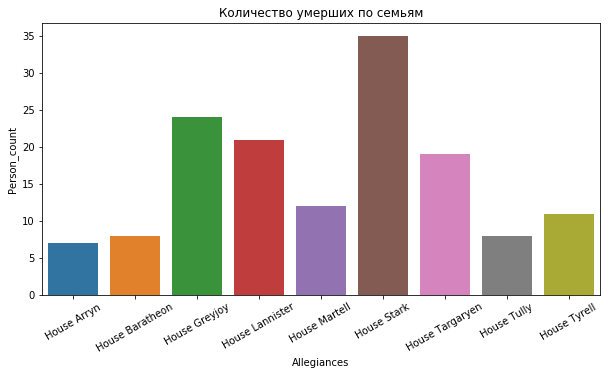

In [61]:
plt.figure(figsize=(10,5))
pic = sns.barplot(x = 'Allegiances', y = 'Person_count', data = house)
pic.set_xticklabels(rotation=30, labels = house['Allegiances'])
plt.title('Количество умерших по семьям')

Text(0.5, 1.0, 'Количество умерших по семьям')

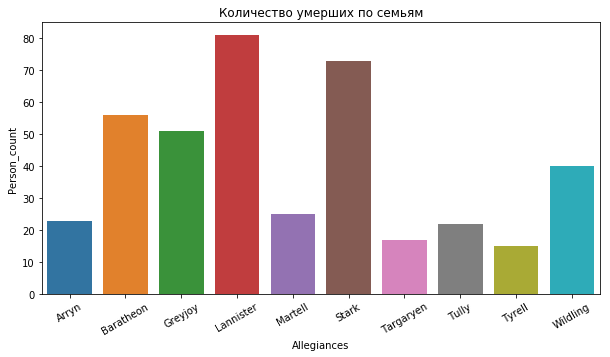

In [62]:
fam = fam.drop(fam[fam['Allegiances'] == "Night's Watch"].index)

plt.figure(figsize=(10,5))
pic = sns.barplot(x = 'Allegiances', y = 'Person_count', data = fam)
pic.set_xticklabels(rotation=30, labels = fam['Allegiances'])
plt.title('Количество умерших по семьям')

То есть, оказывается, больше всего людей погибло за Старков, а вот среди самих высокородных претендентов мучениками оказались Ланистеры (казалось, бы самая пакостная семья, а пострадала больше всего). 

In [63]:
house['Person_count'].min()

7

In [64]:
house[house['Person_count']==7]

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
3,House Arryn,7,4,3


In [65]:
house['Person_count'].max()

35

In [66]:
house[house['Person_count']==35]

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
8,House Stark,35,29,6


In [67]:
house['Person_count'].mean()

16.11111111111111

In [68]:
np.std(house['Person_count'])

8.874989132318158

Видим, что больше всего погибших в доме Старков - 35 человек, меньше всего - 7 - в доме Аррена. Среднее по всем домам - 16 человек (мат. ожидание), среднеквадратичное отклонение примерно 8 человек.)

In [69]:
fmin = fam['Person_count'].min()
fmax = fam['Person_count'].max()
fmean = fam['Person_count'].mean()
fstd = fam['Person_count'].std()

In [70]:
fam[fam['Person_count']==fmin]

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
18,Tyrell,15,9,6


In [71]:
fam[fam['Person_count']==fmax]

,Allegiances,Person_count,Male_gender_sum,Female_gender_sum
12,Lannister,81,69,12


In [72]:
print(f'Аналогично для семей: минимальное количество умерших - {fmin} - было в семье Тиреллов, максимальное - {fmax} - в семье Ланнистеров. Среднее число погибших равно {fmean}, а стандартное отклонение равно {fstd}. ')

Аналогично для семей: минимальное количество умерших - 15 - было в семье Тиреллов, максимальное - 81 - в семье Ланнистеров. Среднее число погибших равно 40.3, а стандартное отклонение равно 23.893513764199692. 


Text(0.5, 1.0, 'Распределение смертей героев по годам')

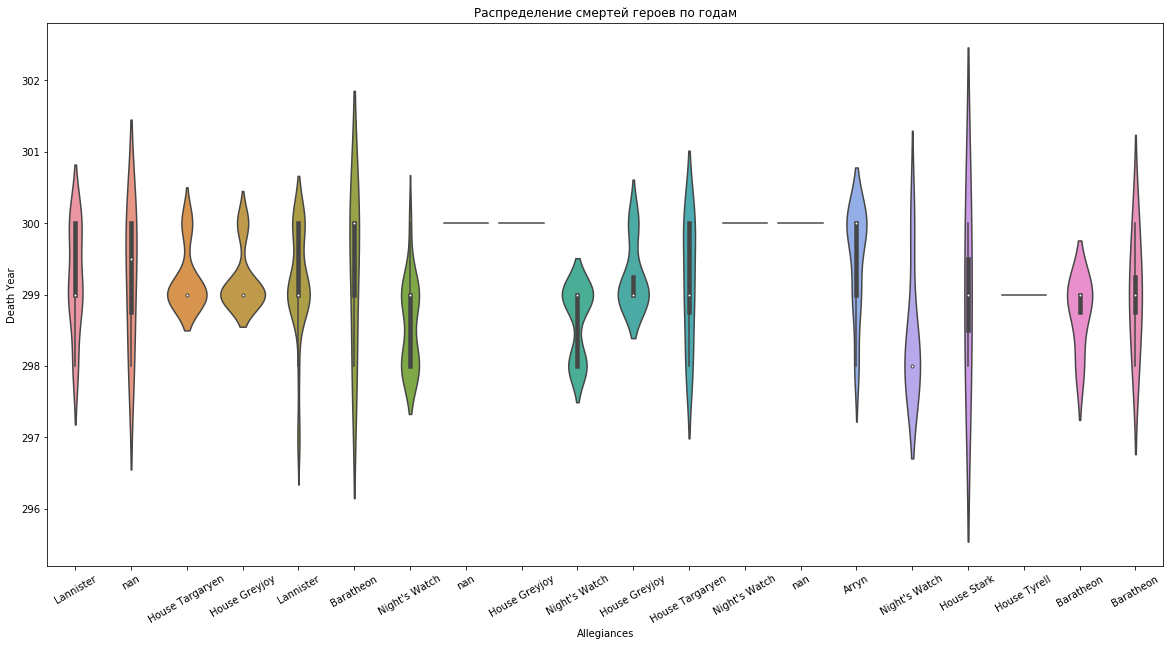

In [81]:
plt.figure(figsize=(20,10))
pic = sns.violinplot(x='Allegiances', y='Death Year', data=deathDF)
pic.set_xticklabels(rotation=30, labels = deathDF['Allegiances'])
plt.title('Распределение смертей героев по годам')

In [74]:
deathDF['Allegiances'].value_counts()

Night's Watch      116
Lannister           81
Stark               73
Baratheon           56
Greyjoy             51
Wildling            40
House Stark         35
Martell             25
House Greyjoy       24
Arryn               23
Tully               22
House Lannister     21
House Targaryen     19
Targaryen           17
Tyrell              15
House Martell       12
House Tyrell        11
House Tully          8
House Baratheon      8
House Arryn          7
Name: Allegiances, dtype: int64

In [76]:
deathDF[deathDF['Allegiances']=='Baratheon']['Allegiances'].rename('Baratheon')

5      Baratheon
18     Baratheon
19     Baratheon
22     Baratheon
26     Baratheon
34     Baratheon
42     Baratheon
59     Baratheon
103    Baratheon
113    Baratheon
114    Baratheon
116    Baratheon
137    Baratheon
149    Baratheon
150    Baratheon
156    Baratheon
166    Baratheon
168    Baratheon
176    Baratheon
181    Baratheon
184    Baratheon
211    Baratheon
230    Baratheon
231    Baratheon
275    Baratheon
289    Baratheon
310    Baratheon
311    Baratheon
363    Baratheon
373    Baratheon
408    Baratheon
422    Baratheon
425    Baratheon
450    Baratheon
477    Baratheon
508    Baratheon
527    Baratheon
528    Baratheon
539    Baratheon
555    Baratheon
557    Baratheon
623    Baratheon
624    Baratheon
629    Baratheon
643    Baratheon
649    Baratheon
653    Baratheon
695    Baratheon
700    Baratheon
724    Baratheon
738    Baratheon
749    Baratheon
757    Baratheon
759    Baratheon
793    Baratheon
810    Baratheon
Name: Baratheon, dtype: object

In [77]:
deathDF[deathDF['Allegiances']=='Lannister']['Allegiances'].rename('Lannister')

0      Lannister
4      Lannister
27     Lannister
38     Lannister
45     Lannister
         ...    
833    Lannister
836    Lannister
839    Lannister
874    Lannister
887    Lannister
Name: Lannister, Length: 81, dtype: object

In [78]:
deathDF[deathDF['Allegiances']=='House Targaryen']['Allegiances'].rename('House Targaryen')

2      House Targaryen
11     House Targaryen
79     House Targaryen
117    House Targaryen
162    House Targaryen
203    House Targaryen
306    House Targaryen
323    House Targaryen
371    House Targaryen
375    House Targaryen
400    House Targaryen
401    House Targaryen
552    House Targaryen
576    House Targaryen
673    House Targaryen
796    House Targaryen
857    House Targaryen
902    House Targaryen
910    House Targaryen
Name: House Targaryen, dtype: object

In [79]:
deathDF[deathDF['Allegiances']=="Night's Watch"]['Allegiances'].rename("Night's Watch")

6      Night's Watch
9      Night's Watch
12     Night's Watch
15     Night's Watch
23     Night's Watch
           ...      
881    Night's Watch
890    Night's Watch
899    Night's Watch
908    Night's Watch
909    Night's Watch
Name: Night's Watch, Length: 116, dtype: object

In [80]:
d2 = pd.DataFrame(deathDF['Death Year'].groupby(deathDF['Allegiances']))
d2

,0,1
0,Arryn,14 NaN 33 NaN 40 NaN 83 ...
1,Baratheon,5 NaN 18 NaN 19 300.0 22 ...
2,Greyjoy,31 NaN 36 NaN 102 NaN 163 ...
3,House Arryn,72 NaN 145 NaN 364 298.0 495 ...
4,House Baratheon,146 NaN 221 NaN 337 300.0 393 ...
5,House Greyjoy,3 300.0 8 NaN 10 299.0 57 ...
6,House Lannister,32 299.0 124 NaN 130 NaN 175 ...
7,House Martell,43 NaN 44 NaN 125 NaN 540 ...
8,House Stark,16 299.0 24 298.0 68 NaN 106 ...
9,House Targaryen,2 NaN 11 NaN 79 NaN 117 ...


Text(0.5, 1.0, 'Распределение смертей героев по годам')

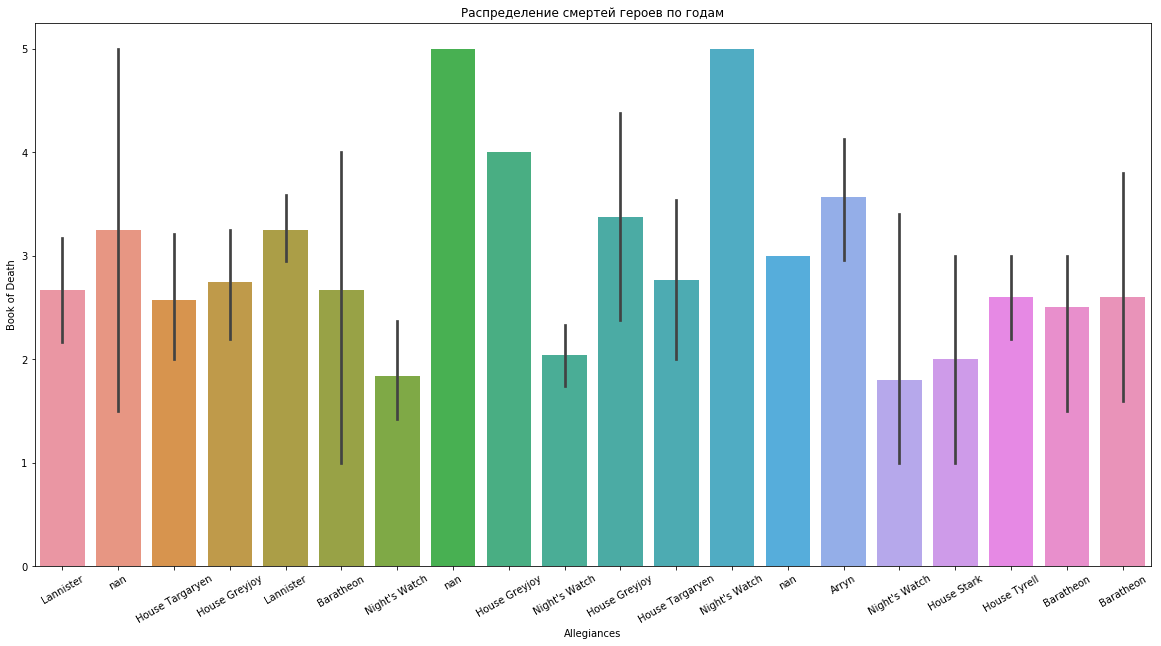

In [84]:
plt.figure(figsize=(20,10))
pic = sns.barplot(x='Allegiances', y='Book of Death', data=deathDF)
pic.set_xticklabels(rotation=30, labels = deathDF['Allegiances'])
plt.title('Распределение смертей героев по годам')

In [88]:
deathDF['Book of Death'] = deathDF['Book of Death'].fillna(0)

In [89]:
deathDF['Book of Death']

0      0.0
1      3.0
2      0.0
3      5.0
4      0.0
      ... 
912    0.0
913    5.0
914    5.0
915    5.0
916    4.0
Name: Book of Death, Length: 917, dtype: float64

In [90]:
book = pd.DataFrame(deathDF['Book of Death'].groupby(deathDF['Allegiances']))
#d.reset_index()
#d = d.rename({'Name': 'Person_count'}, axis='columns')
book

,0,1
0,Arryn,14 0.0 33 0.0 40 0.0 83 0.0 12...
1,Baratheon,5 0.0 18 0.0 19 4.0 22 2.0 26...
2,Greyjoy,31 0.0 36 0.0 102 0.0 163 5.0 17...
3,House Arryn,72 0.0 145 0.0 364 1.0 495 3.0 53...
4,House Baratheon,146 0.0 221 0.0 337 5.0 393 3.0 40...
5,House Greyjoy,3 5.0 8 0.0 10 2.0 57 0.0 15...
6,House Lannister,32 2.0 124 0.0 130 0.0 175 0.0 29...
7,House Martell,43 0.0 44 0.0 125 0.0 540 0.0 56...
8,House Stark,16 2.0 24 3.0 68 0.0 106 0.0 12...
9,House Targaryen,2 0.0 11 0.0 79 0.0 117 0.0 16...


<BarContainer object of 917 artists>

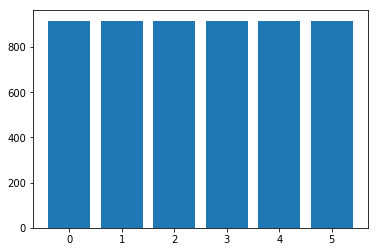

In [98]:
plt.bar(x=deathDF['Book of Death'], height=deathDF['Name'].count())

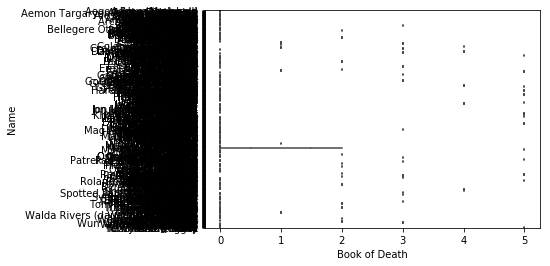

In [100]:
ax = sns.boxplot(x='Book of Death', y='Name', data=deathDF)

In [110]:
d3 = deathDF['Book of Death'].groupby(deathDF['Allegiances'])
#d3.reset_index()
d3

,0,1
0,Arryn,14 0.0 33 0.0 40 0.0 83 0.0 12...
1,Baratheon,5 0.0 18 0.0 19 4.0 22 2.0 26...
2,Greyjoy,31 0.0 36 0.0 102 0.0 163 5.0 17...
3,House Arryn,72 0.0 145 0.0 364 1.0 495 3.0 53...
4,House Baratheon,146 0.0 221 0.0 337 5.0 393 3.0 40...
5,House Greyjoy,3 5.0 8 0.0 10 2.0 57 0.0 15...
6,House Lannister,32 2.0 124 0.0 130 0.0 175 0.0 29...
7,House Martell,43 0.0 44 0.0 125 0.0 540 0.0 56...
8,House Stark,16 2.0 24 3.0 68 0.0 106 0.0 12...
9,House Targaryen,2 0.0 11 0.0 79 0.0 117 0.0 16...
